# TermProject Final Report

소프트웨어융합학과 2019102121 이한수

# 목차 (클릭하시면 해당 항목으로 이동합니다)

## &nbsp; [Proposal](#Proposal)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [1.주제](#1.주제)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [2. 주제 선정 이유](#2.주제-선정-이유)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [3. 기획](#3.기획)

## &nbsp; [Report](#Report)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [4.Framwrok](#4.Framework)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [5.Objects](#5.Objects)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [6.Codes](#6.Codes)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [7.Result](#7.Result)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [8.Github](#8.Github)

<hr>

## Proposal

### 1.주제

1. PyGame을 이용하여 게임 만들기

2. PyGame프레임 워크를 개발하기

3. 물리와 삼각함수를 게임에 적용시켜보기

### 2.주제 선정 이유

**1. 왜 PyGame을 이용하여 게임을 만드는가?**

게임은 다양한 소프트웨어 기술들의 집합체입니다.

그런 개발에 필요한 기술들을 파이썬 언어에서는 다양한 모듈들을 통해 손쉽게 사용할 수 있습니다.

그런 장점이 있는 언어를 이용하여 게임 개발을 해는 것이 좋다고 생각하였습니다.

따라서 파이썬에서 게임 개발을 지원해주는 PyGame을 이용하기로 결정하였습니다.

**2. 왜 PyGame 프레임 워크를 개발하는가?**

PyGame은 게임 엔진이 아니라 기능을 지원해주는 모듈입니다.

따라서 게임 개발을 하면 PyGame의 기능을 반복적으로 사용하는 일이 있습니다.

반복 되는 행동과 코드의 양을 동시에 줄이기 위해 함수화하고

그 함수들을 클래스로 묶는 것이 개발 하는데 최적화 방법이므로

프레임워크를 개발해보는 것이 좋다고 생각하였습니다.

[DL-Engine-PyGame](https://github.com/DaLae37/DL-Engine)

**3. 왜 물리와 삼각함수를 게임에 적용시켜보는가?**

고등학교 때부터 게임을 만들기 위해서는 물리와 수학이 중요하다고 들어왔습니다.

대학교에 진학하여 물리와 미적분을 배우면서 게임에 응용할만한 내용이 많다고 생각이 들었습니다.

게임에서 물리와 수학이 어떻게 쓰일 수 있는지 경험해보고자 물리와 수학을 게임에 적용시켜보는 것을 주제로 삼았습니다.

또한 저는 게임콘텐츠 트랙을 희망하고 있어 게임 개발 프로젝트를 진행해보는 것이 좋다고 생각하였습니다.

### 3.기획

씬은 mainScene, gameScene, rankingScene 세 가지 씬이 존재합니다.

플레이어와 공, 데이터들은 singleton class로 구현할 것입니다.

게임이 시작되면 공을 띄우고 그 공을 때릴 수 있습니다.

단, 친 공은 물이 아닌 땅에 떨어져야합니다.

이런 조건을 지키기 위해 플레이어가 공에 가하는 힘과 각도를 조절 할 필요가 있습니다.

그 조건이 이 게임에서 가장 중요한 요소입니다.

플레이어가 친 공이 땅에 떨어지면 point가 +1이 되며 그 위치에서 한 번 더 타격을 할 수있습니다.

이런 동작을 물에 떨어질 때까지나 목적지에 다다를 때까지 반복합니다.

결과에 따라 보상을 받을 것이며

그 보상(재화)으로 플레이어가 가할 수 있는 힘의 최대치를 증가한다던지,

공의 탄성도를 증가시킨다던지 등 게임의 요소를 구매할 수 있습니다.

미적분 시간에 배웠던 쌍곡선 삼각함수를 이용하여 바다 파도를 구현할 것입니다.

또 물리 시간에 배웠던 포물선 운동을 이용하여 공의 움직임을 구현할 것입니다.

mainScene
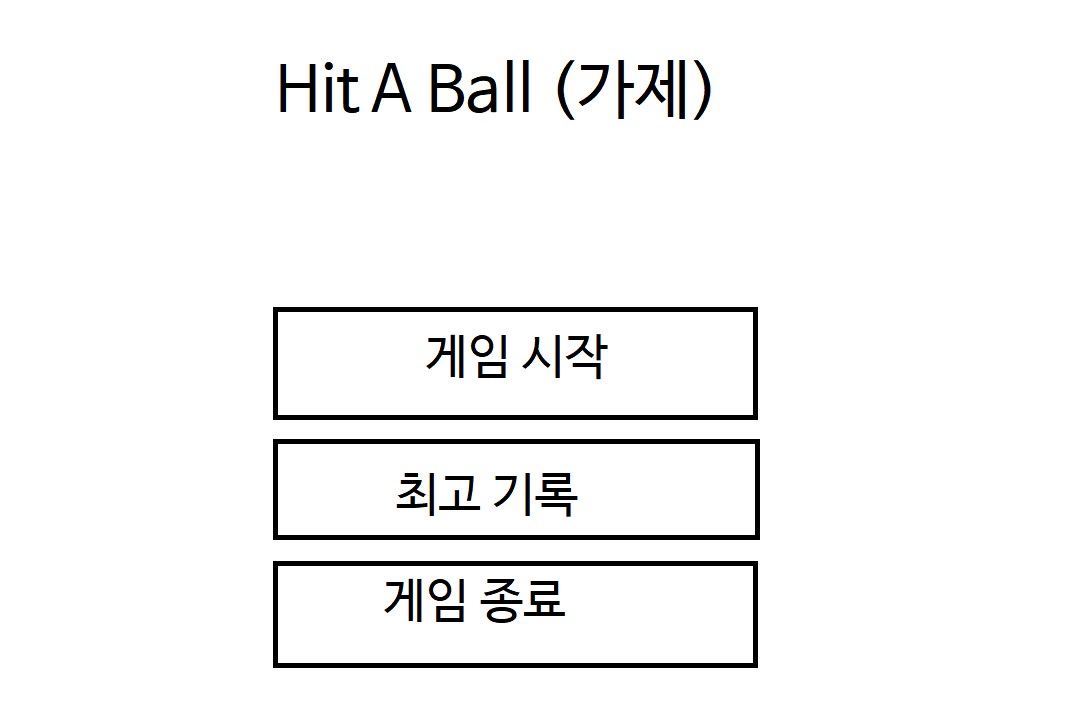

gameScene
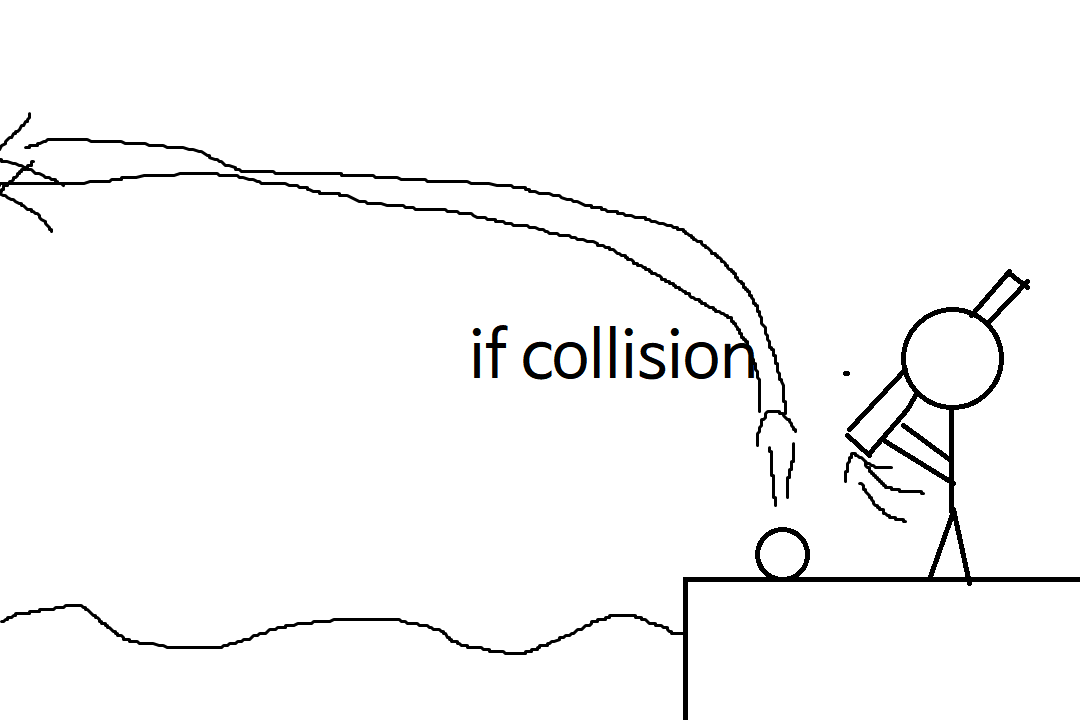
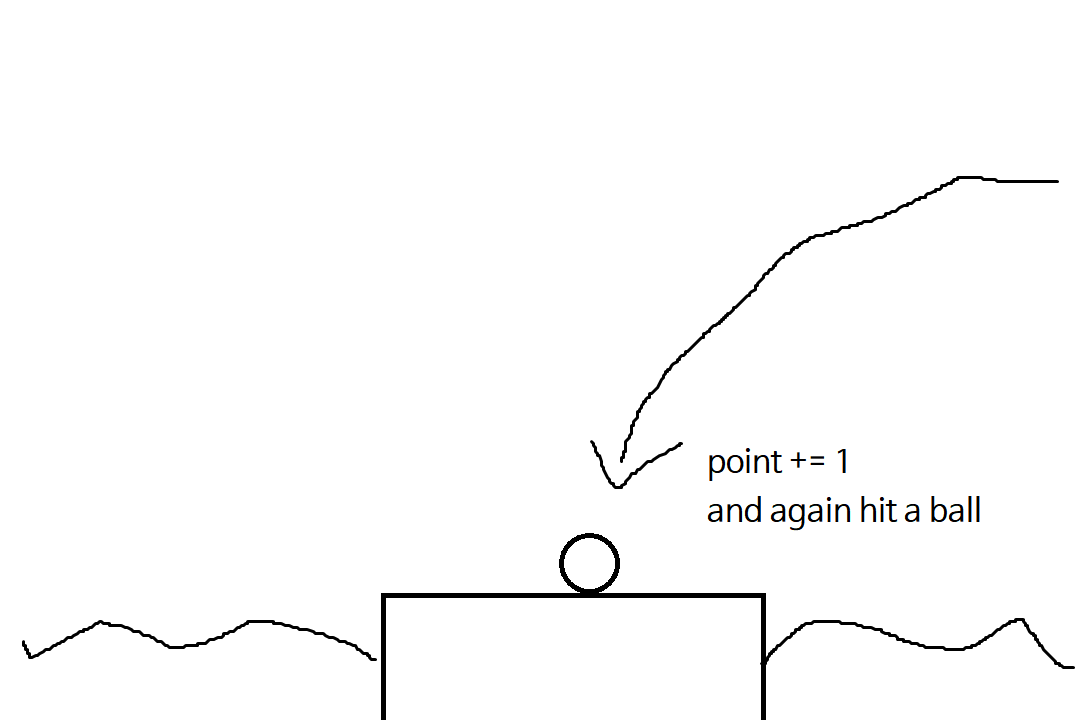

## Report

### 4.Framework

뼈대 공사먼저 하여 건물을 튼튼하게 짓는 것 처럼

프레임워크를 작성하여 게임 개발을 용이하게 하도록 하였습니다

pygame은 기본적인 프레임 워크를 지원하지 않습니다.

따라서 개발 결과물을 보면 한 파일에 

사운드 기능과 씬 전환, 카메라 기능을 모두 넣어야하는 경우가 많습니다.

그럴 경우 한 파일의 코드 수가 어마어마하게 늘어나는 문제가 있습니다.

저는 이 문제를 해결하기 위해

프레임워크를 작성하고 개발하였습니다.

아래는 애니메이션 기능을 구현한 animaton.py 파일입니다.

pygame은 애니메이션을 직접적으로 지원하지 않기 때문에 이미지의 반복으로 애니메이션을 구현하였습니다.

각각의 Sprite를 리스트에 저장한 후 그 Sprite를

1초에 정해진 frame 수만큼 index를 반복합니다.

예) 10frame -> 1초에 10개의 Sprite 출력

In [1]:
import pygame
import time
from pygame import Surface
from pygame.color import Color
from pygame.sprite import Sprite

class Animation(Sprite) :
    def __init__(self, images, frames):
        Sprite.__init__(self)
        self.clock = pygame.time.Clock()

        self.images = list()
        self.frames = frames
        self.beforeTime = 0

        for i in images :
            self.images.append(pygame.image.load(i))

        self.image_count = len(images)
        self.current_frame = 0
        self.image = self.images[self.current_frame]

        self.rect = pygame.Rect(0, 0, self.image.convert().get_width(), self.image.convert().get_height())

    def update(self):
        if time.time() - self.beforeTime > 1 / self.frames :
            if self.current_frame is self.image_count -1 :
                self.current_frame = 0
            else:
                self.current_frame += 1
            self.image = self.images[self.current_frame]
            self.beforeTime = time.time()

    def setPos(self, pos) :
        self.rect.x = pos[0]
        self.rect.y = pos[1]

    def addPos(self, pos) :
        self.rect.x += pos[0]
        self.rect.y += pos[1]

    def getPos(self) :
        return (self.rect.x, self.rect.y)

    def getSize(self) :
        return self.image.get_size()

    def getSurface(self) :
        return self.image

    def isCollisionRect(self, pos) :
        left_x = self.getPos()[0]
        left_y = self.getPos()[1]
        right_x = self.getPos()[0] + self.getSize()[0]
        right_y = self.getPos()[1] + self.getSize()[1]

        return left_x <= pos[0] and left_y <= pos[1] and right_x >= pos[0] and right_y >= pos[1]

    def getTag(self) :
        return "Animation"

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


아래는 씬 전환 기능을 구현한 sceneManager.py 파일입니다.

파일에는 Scene과 SceneManager 이 두 가지 클래스가 있습니다.

게임 내의 모든 씬은 Scene클래스를 상속받으며 60프레임으로 반복되는 함수 update에서 이미지 랜더와 오브젝트 동작이 동시에 이뤄집니다.

In [2]:
class Scene() :
    def update(self) :
        pass
    def load_resources(self) :
        pass
    def ui_event(self) :
        pass

class SceneManager(Scene) :
    instance = None
    point = 0
    
    def __init__(self) :
        self.isQuit = False
        self.current_scene = None

    @classmethod
    def getInstance(cls) :
        if cls.instance is None :
            cls.instance = SceneManager()
        return cls.instance

    def changeScene(self, replaced_scene) :
        self.current_scene = replaced_scene

    def update(self) :
        self.current_scene.update()

    def setQuit(self, isQuit) :
        self.isQuit = isQuit

    def setPoint(self, point) :
        self.point = point

    def getPoint(self) :
        return self.point

아래는 simple_image.py 파일입니다.

SimpleImage 클래스는 단순한 배경화면, UI 등 pygame의 Sprite클래스의 모든 기능이 필요하지 않은 Image를 위해 구현하였습니다.

In [3]:
import pygame

class SimpleImage() :

    centerMode = False

    def __init__(self, directory) :
        self.image = pygame.image.load(directory)
        self.rect = self.image.get_rect()
        self.centerMode = False

    def getInfo(self) :
        return (self.image, self.rect)

    def setPos(self, pos) :
        self.rect.x = pos[0] - ((self.getSize()[0] // 2) if self.centerMode else 0)
        self.rect.y = pos[1] - ((self.getSize()[1] // 2) if self.centerMode else 0)

    def addPos(self, pos) :
        self.rect.x += pos[0]
        self.rect.y += pos[1]

    def getPos(self) :
        return (self.rect.x, self.rect.y)

    def setSize(self, size) :
        if self.centerMode :
            self.addPos((self.getSize()[0] // 2, self.getSize()[1] // 2))
        self.image = pygame.transform.scale(self.image,size)
        self.setPos(self.getPos())

    def getSize(self) :
        return self.image.get_size()

    def setCenterMode(self, centerMode) :
        self.centerMode = centerMode

    def getSurface(self) :
        return self.image

    def setSurface(self, image) :
        self.image = image

    def isCollisionRect(self, pos) :
        left_x = self.getPos()[0]
        left_y = self.getPos()[1]
        right_x = self.getPos()[0] + self.getSize()[0]
        right_y = self.getPos()[1] + self.getSize()[1]

        return left_x <= pos[0] and left_y <= pos[1] and right_x >= pos[0] and right_y >= pos[1]

    def getTag(self) :
        return "SimpleImage"

아래는 사운드 기능을 구현한 soundManager.py 파일입니다.

배경음악은 music

효과음 등 단발성 사운드는 sound로 구분하여 사용합니다.

효과음은 한 번 불러온 뒤 반복적으로 실행하는 경우가 있으므로

딕셔너리에 "사운드 이름" : 사운드 객체 로 저장하여 사용합니다.

In [5]:
import pygame
import os, sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(__file__))))

class SoundManager() :
    instance = None

    def __init__(self) :
        self.sound_dict = dict()

    @classmethod
    def getInstance(cls) :
        if cls.instance is None :
            cls.instance = SoundManager()
        return cls.instance

    def load_music(self, directory) :
        self.stop_music()

        pygame.mixer.music.load(directory)
        pygame.mixer.music.play(-1)

    def stop_music(self) :
        if pygame.mixer.get_busy() :
            pygame.mixer.music.stop()

    def load_sound(self, directory, sound_name) :
        sound = pygame.mixer.Sound(directory)
        self.sound_dict[sound_name] = sound

    def play_sound(self, sound_name) :
        self.sound_dict[sound_name].play()

아래는 cameraManager.py 파일입니다.

오브젝트 추적 기능이 있으며

모든 오브젝트를 랜더할 때 위치를 카메라와 상대 위치를 구해서 랜더 하여 카메라 기능을 구현하였습니다.

In [2]:
import pygame
import os, sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(__file__))))

class CameraManager() :
    isFollowing = False
    followedObject = None
    instance = None
    cameraX = 0
    cameraY = 0
    dX = 0
    dy = 0
    def update(self) :
        if self.isFollowing and self.followedObject.getIsMove() is True :
            x = self.followedObject.getPos()[0]
            y = self.followedObject.getPos()[1]
            self.addCameraPos((x - self.dX, y - self.dY))
            self.dX = x
            self.dY = y
            if self.getCameraPos()[1] > 0 :
                self.setCameraPos((self.getCameraPos()[0],0))

    @classmethod
    def getInstance(cls) :
        if cls.instance is None :
            cls.instance = CameraManager()
        return cls.instance

    def setCameraPos(self, pos) :
        self.cameraX = pos[0]
        self.cameraY = pos[1]

    def addCameraPos(self, pos) :
        self.cameraX += pos[0]
        self.cameraY += pos[1]

    def getCameraPos(self) :
        return (self.cameraX, self.cameraY)

    def setFollowedObject(self, obj) :
        self.followedObject = obj
        x = self.followedObject.getPos()[0]
        y = self.followedObject.getPos()[1]
        self.dX = x
        self.dY = y
        self.isFollowing = True

    def releaseObject(self) :
        self.followedObject = None
        self.isFollowing = False

## 5.Objects

In [ ]:
from Framework.simple_image import SimpleImage
import pygame
import math
import os, sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(__file__))))

class Ball(SimpleImage) :
    instance = None
    def __init__(self) :
        super().__init__("Resources/Images/Ball/Ball.png")
        self.isMove = False
        self.isStart = False
        self.t = 0
        self.power = 50
        self.beforeT = 0
        self.degree = 0

    def update(self) :

        if self.isStart :
            if self.isMove :
                self.addPos((-self.power * math.cos(self.degree * math.pi / 180), -self.power * math.sin(self.degree * math.pi / 180) + 9.8 * (self.t - self.beforeT)))
        else :
            self.addPos((0,0.5 * 9.8 * (self.t * self.t)))

        self.t+=1

    def setIsMove(self, isMove) :
        if self.isMove is False and isMove is True :
            self.beforeT = self.t
        self.isMove = isMove

    def getIsMove(self) :
        return self.isMove

    def setIsStart(self, isStart) :
        if self.isStart is True :
            self.t = 0
        self.isStart = isStart

    def getIsStart(self) :
        return self.isStart

    def setPower(self, power) :
        self.power = power

    def setDegree(self, degree) :
        self.degree = degree

In [ ]:
from Framework.simple_image import SimpleImage
import os, sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(__file__))))

class OverGround(SimpleImage) :
    def __init__(self) :
        super().__init__("Resources/Images/Ground/overGround.png")

    def whereCollide(self, movedObject) :
        mX = movedObject.getPos()[0]
        mY = movedObject.getPos()[1]
        mSY = movedObject.getSize()[1]

        if mY < 620:
            return 0
        else :
            return 1

    def getTag(self) :
        return "Ground"
class UnderGround(SimpleImage) :
    def __init__(self) :
        super().__init__("Resources/Images/Ground/underGround.png")

    def whereCollide(self, movedObject) :
        return 1

    def getTag(self) :
        return "Ground"

### 6.Codes

main.py

In [6]:
import pygame

from Framework.sceneManager import SceneManager
from mainScene import mainScene

if __name__ == '__main__' :
    pygame.init()
    pygame.mixer.pre_init(44100, 16, 2, 4096) #Frequency, Size, Channels, BufferSize

    screen = pygame.display.set_mode((1280, 720))
    pygame.display.set_caption("Hit A Ball")
    clock = pygame.time.Clock()
    run = True

    SceneManager.getInstance().changeScene(mainScene(screen,clock))

    while run:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
                pass

        if SceneManager.getInstance().isQuit :
            run = False

        SceneManager.getInstance().update()
        pygame.display.flip()
        clock.tick(60)

    pygame.quit()


In [7]:
import pygame
from Framework.sceneManager import Scene, SceneManager
from Framework.soundManager import SoundManager
from Framework.animation import Animation
from Framework.simple_image import SimpleImage

class mainScene(Scene) :

    simple_image_list = []

    def __init__(self, screen, clock) :
        self.screen = screen
        self.clock = clock

        self.load_resources()

    def update(self) :

        for si in self.simple_image_list :
            self.screen.blit(si.getSurface(), si.getPos())

        self.screen.blit(self.title, (350,100))

        for event in pygame.event.get() :
            if event.type == pygame.QUIT :
                SceneManager.getInstance().isQuit = True
                return

            if event.type == pygame.MOUSEBUTTONDOWN :
                if self.startButton.isCollisionRect(pygame.mouse.get_pos()) :
                    from gameScene import gameScene
                    SceneManager.getInstance().changeScene(gameScene(self.screen, self.clock))
                    return

                if self.exitButton.isCollisionRect(pygame.mouse.get_pos()) :
                    SceneManager.getInstance().isQuit = True
                    return


    def load_resources(self) :
        SoundManager.getInstance().load_music("Resources/Sounds/BGM.mp3")

        self.background = SimpleImage("Resources/Images/Background/mainScene.png")
        self.background.setPos((0,0))
        self.background.setSize((1280,720))
        self.simple_image_list.append(self.background)

        self.startButton = SimpleImage("Resources/Images/UI/Start.png")
        self.startButton.setCenterMode(True)
        self.startButton.setPos((640,400))
        self.startButton.setSize((300, 100))
        self.simple_image_list.append(self.startButton)

        self.exitButton = SimpleImage("Resources/Images/UI/Exit.png")
        self.exitButton.setCenterMode(True)
        self.exitButton.setPos((640, 550))
        self.exitButton.setSize((300, 100))
        self.simple_image_list.append(self.exitButton)


        self.title = pygame.font.SysFont("Monospace", 100).render("Hit A Ball", True, (0,0,0))

In [8]:
import pygame
import math
import random
from Objects.ball import Ball
from Objects.ground import UnderGround, OverGround
from Framework.sceneManager import Scene, SceneManager
from Framework.animation import Animation
from Framework.simple_image import SimpleImage
from Framework.cameraManager import CameraManager

class gameScene(Scene) :

    objectList = []
    uiList = [] #barPos = ui[0] barSize = ui[1] borderColor = ui[2] barColor = ui[3]

    def __init__(self, screen, clock) :
        self.screen = screen
        self.clock = clock

        self.isMove = False
        self.powerOn = False
        self.power = 0
        self.degreeOn = False
        self.degree = 0

        self.t = 0
        self.waterAnim = list()

        self.beforeCamX = 0
        self.beforeCamY = 0

        self.load_resources()

    def update(self) :
        CameraManager.getInstance().update()
        self.screen.fill(pygame.Color('white'))
        self.ball.update()

        camX = CameraManager.getInstance().getCameraPos()[0]
        camY = CameraManager.getInstance().getCameraPos()[1]
        for si in self.objectList :
            siX = si.getPos()[0]
            siY = si.getPos()[1]

            if siX > 2500 : #카메라에서 벗어난 객체는 삭제
                self.objectList.remove(si)

            else : #벗어나지 않은 객체는 카메라와의 거리를 고려해 Render
                if not (CameraManager.getInstance().followedObject is si) :
                    si.setPos((siX -(camX - self.beforeCamX) ,siY - (camY - self.beforeCamY)))
                self.screen.blit(si.getSurface(), si.getPos())

            if si.getTag() is "Animation" :
                si.update()

            if si.isCollisionRect(self.ball.getPos()) :
                if si.getTag() is "Ground" :
                    if si.whereCollide(self.ball) is 0 :
                        if self.ball.getIsStart() is False :
                            self.ball.setIsStart(True)
                        if self.ball.getIsMove() is True :
                            self.ball.setIsMove(False)
                            SceneManager.getInstance().setPoint(SceneManager.getInstance().getPoint() + 1)
                        self.ball.setPos((self.ball.getPos()[0], si.getPos()[1] - self.ball.getSize()[1]))

                    else :
                        self.ball.setIsStart(False)
                        self.ball.setPos((si.getPos()[0] + si.getSize()[0], self.ball.getPos()[1]))

                elif si.getTag() is "Animation" :
                    CameraManager.getInstance().releaseObject()
                    CameraManager.getInstance().setCameraPos((0,0))
                    from resultScene import resultScene
                    SceneManager.getInstance().changeScene(resultScene(self.screen,self.clock))
                    return
        self.beforeCamX = camX
        self.beforeCamY = camY

        for ui in self.uiList :
            barPos = ui[1]
            barSize = ui[2]
            borderColor = ui[3]
            barColor = ui[4]
            if ui[0] is "power" :
                gaze = (self.power * 14 % 350) / 350
            elif ui[0] is "degree" :
                gaze = (self.degree * 11.9 % 350) / 350
            self.DrawBar(barPos, barSize, borderColor, barColor, gaze)

        if self.powerOn :
            self.power+=1
            if self.power > 25 : #power의 증가량은 최대 25까지
                self.power = 0

        if self.degreeOn :
            self.degree+=1
            if self.degree > 30 : #degree의 증가량은 최대 30까지
                self.degree = 0

        for event in pygame.event.get() :
            if event.type == pygame.QUIT :
                SceneManager.getInstance().isQuit = True
                return

            if event.type == pygame.MOUSEBUTTONDOWN :
                self.degreeOn = True

            if event.type == pygame.MOUSEBUTTONUP :
                self.degreeOn = False
                self.ball.setDegree(self.degree + 30)

            if event.type == pygame.KEYDOWN :
                if event.key == pygame.K_SPACE :
                    self.powerOn = True
                if event.key == pygame.K_LEFT :
                    for si in self.objectList :
                        si.addPos((10, 0))
                if event.key == pygame.K_RIGHT :
                    for si in self.objectList :
                        si.addPos((-10, 0))

            if event.type == pygame.KEYUP :
                if event.key == pygame.K_SPACE :
                    self.powerOn = False
                    self.ball.setPower(self.power + 50)

                if event.key == pygame.K_RETURN :
                    self.ball.setIsMove(True)

    def load_resources(self) :
        for i in range(10) :
            underBackground = SimpleImage("Resources/Images/Background/underBackground.png")
            underBackground.setPos((0 - 1280 * i,0))
            self.objectList.append(underBackground)

            background = SimpleImage("Resources/Images/Background/background.png")
            background.setPos((0 - 1280 * i,-500))
            self.objectList.append(background)

        water_list = list()
        for i in range(8) :
            water_list.append('Resources/Images/Water/'+str(i+1)+'.png')

        tmpCount = 0
        for i in range(100) :
            tmp = random.randrange(0, 5) + 1
            if i < 2 or tmpCout > 4:
                tmp = 1

            if tmp >= 2 :
                water = Animation(water_list,8)
                water.setPos((1180 - 100 * i ,620))
                self.objectList.append(water)
                tmpCout += 1
            else :
                overGround = OverGround()
                overGround.setPos((1180 - 100 * i, 520))
                self.objectList.append(overGround)

                underGround = UnderGround()
                underGround.setPos((1180 - 100 * i, 620))
                self.objectList.append(underGround)
                tmpCout = 0

        self.ball = Ball()
        self.ball.setPos((1200, 300))
        self.objectList.append(self.ball)
        CameraManager().getInstance().setFollowedObject(self.ball)

        self.uiList.append(["power",(1000, 50),(200, 20),(0, 0, 0),(0, 128, 0)])
        self.uiList.append(["degree",(1000, 100),(200, 20),(0, 0, 0),(128, 0, 0)])

    def DrawBar(self, pos, size, borderC, barC, progress):
        pygame.draw.rect(self.screen, borderC, (*pos, *size), 1)
        innerPos  = (pos[0]+3, pos[1]+3)
        innerSize = ((size[0]-6) * progress, size[1]-6)
        pygame.draw.rect(self.screen, barC, (*innerPos, *innerSize))

In [ ]:
import pygame
from typing import TYPE_CHECKING
from Framework.sceneManager import Scene, SceneManager
from Framework.soundManager import SoundManager
from Framework.animation import Animation
from Framework.simple_image import SimpleImage

class resultScene(Scene) :

    simple_image_list = []

    def __init__(self, screen, clock) :
        self.screen = screen
        self.clock = clock

        self.load_resources()

    def update(self) :

        for si in self.simple_image_list :
            self.screen.blit(si.getSurface(), si.getPos())

        self.screen.blit(self.title, (350,100))

        for event in pygame.event.get() :
            if event.type == pygame.QUIT :
                SceneManager.getInstance().isQuit = True
                return

            if event.type == pygame.MOUSEBUTTONDOWN :
                if self.startButton.isCollisionRect(pygame.mouse.get_pos()) :
                    from mainScene import mainScene
                    SceneManager.getInstance().changeScene(mainScene(self.screen, self.clock))
                    return

                if self.exitButton.isCollisionRect(pygame.mouse.get_pos()) :
                    SceneManager.getInstance().isQuit = True
                    return


    def load_resources(self) :
        self.background = SimpleImage("Resources/Images/Background/mainScene.png")
        self.background.setPos((0,0))
        self.background.setSize((1280,720))
        self.simple_image_list.append(self.background)

        self.startButton = SimpleImage("Resources/Images/UI/Start.png")
        self.startButton.setCenterMode(True)
        self.startButton.setPos((640,400))
        self.startButton.setSize((300, 100))
        self.simple_image_list.append(self.startButton)

        self.exitButton = SimpleImage("Resources/Images/UI/Exit.png")
        self.exitButton.setCenterMode(True)
        self.exitButton.setPos((640, 550))
        self.exitButton.setSize((300, 100))
        self.simple_image_list.append(self.exitButton)


        self.title = pygame.font.SysFont("Monospace", 100).render("Score : " + str(SceneManager.getInstance().getPoint()), True, (0,0,0))

## 7.Result

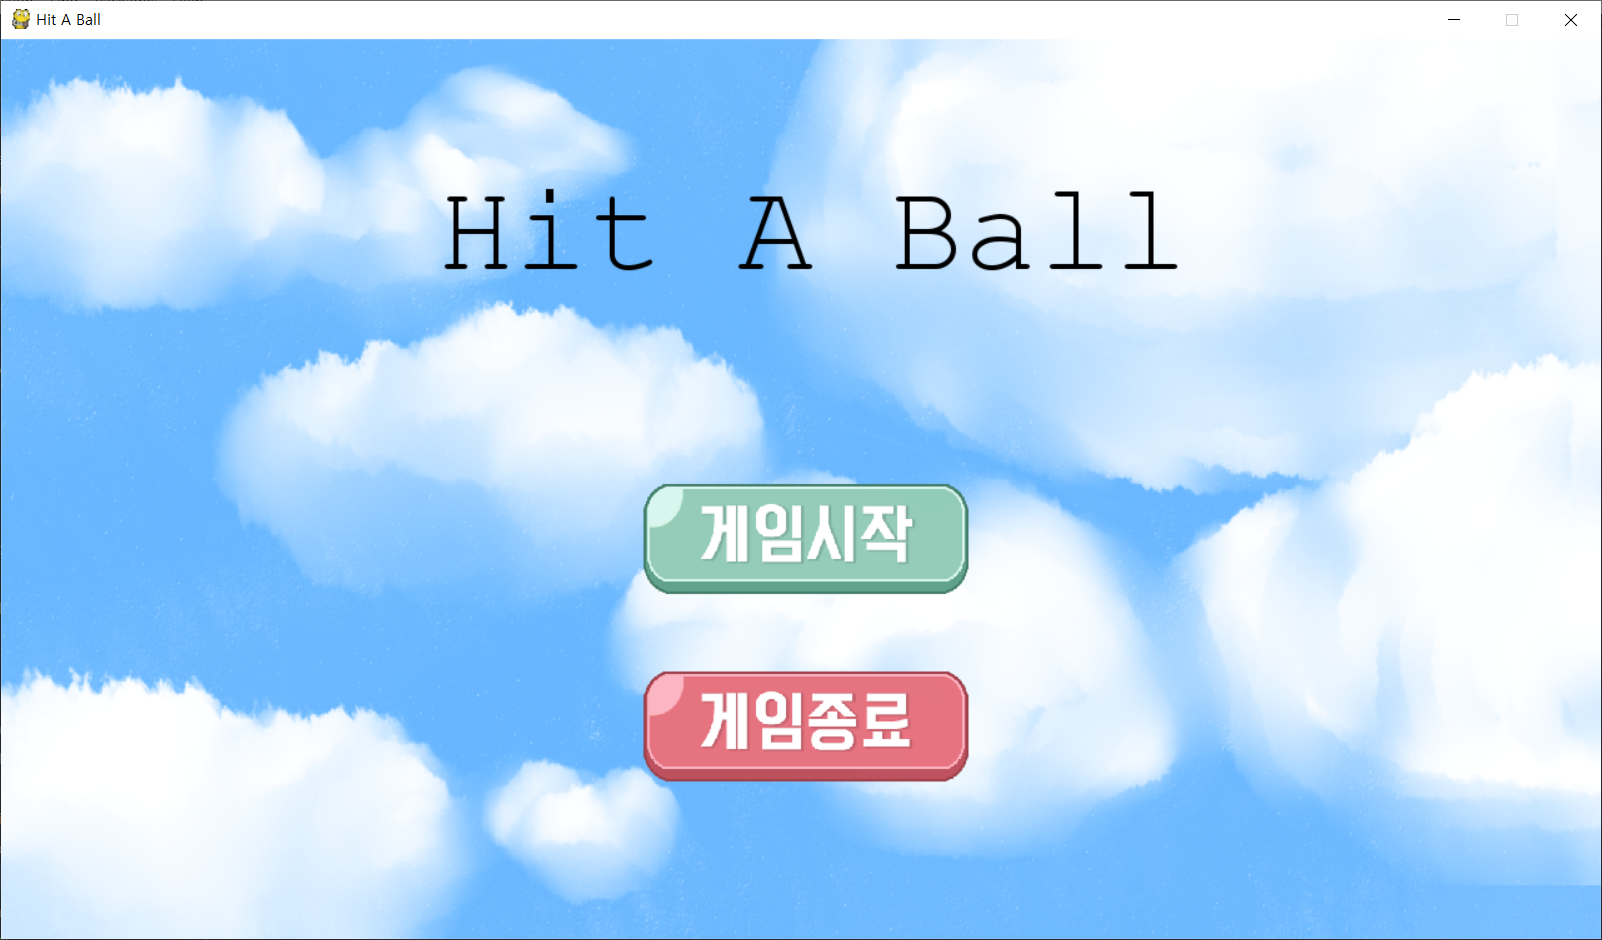

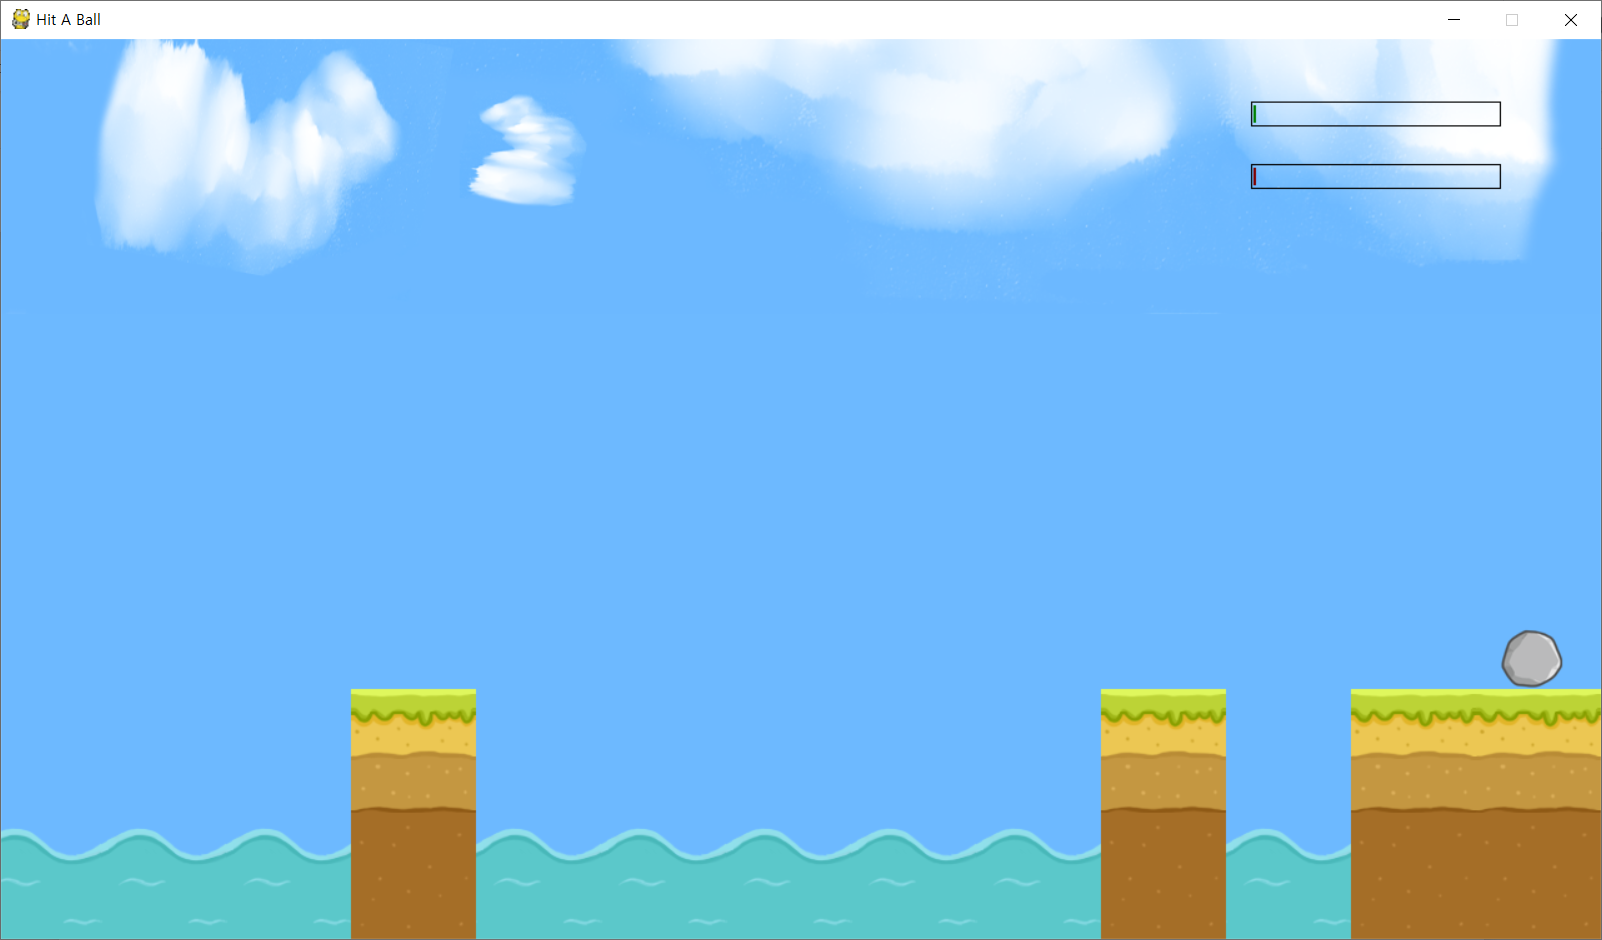

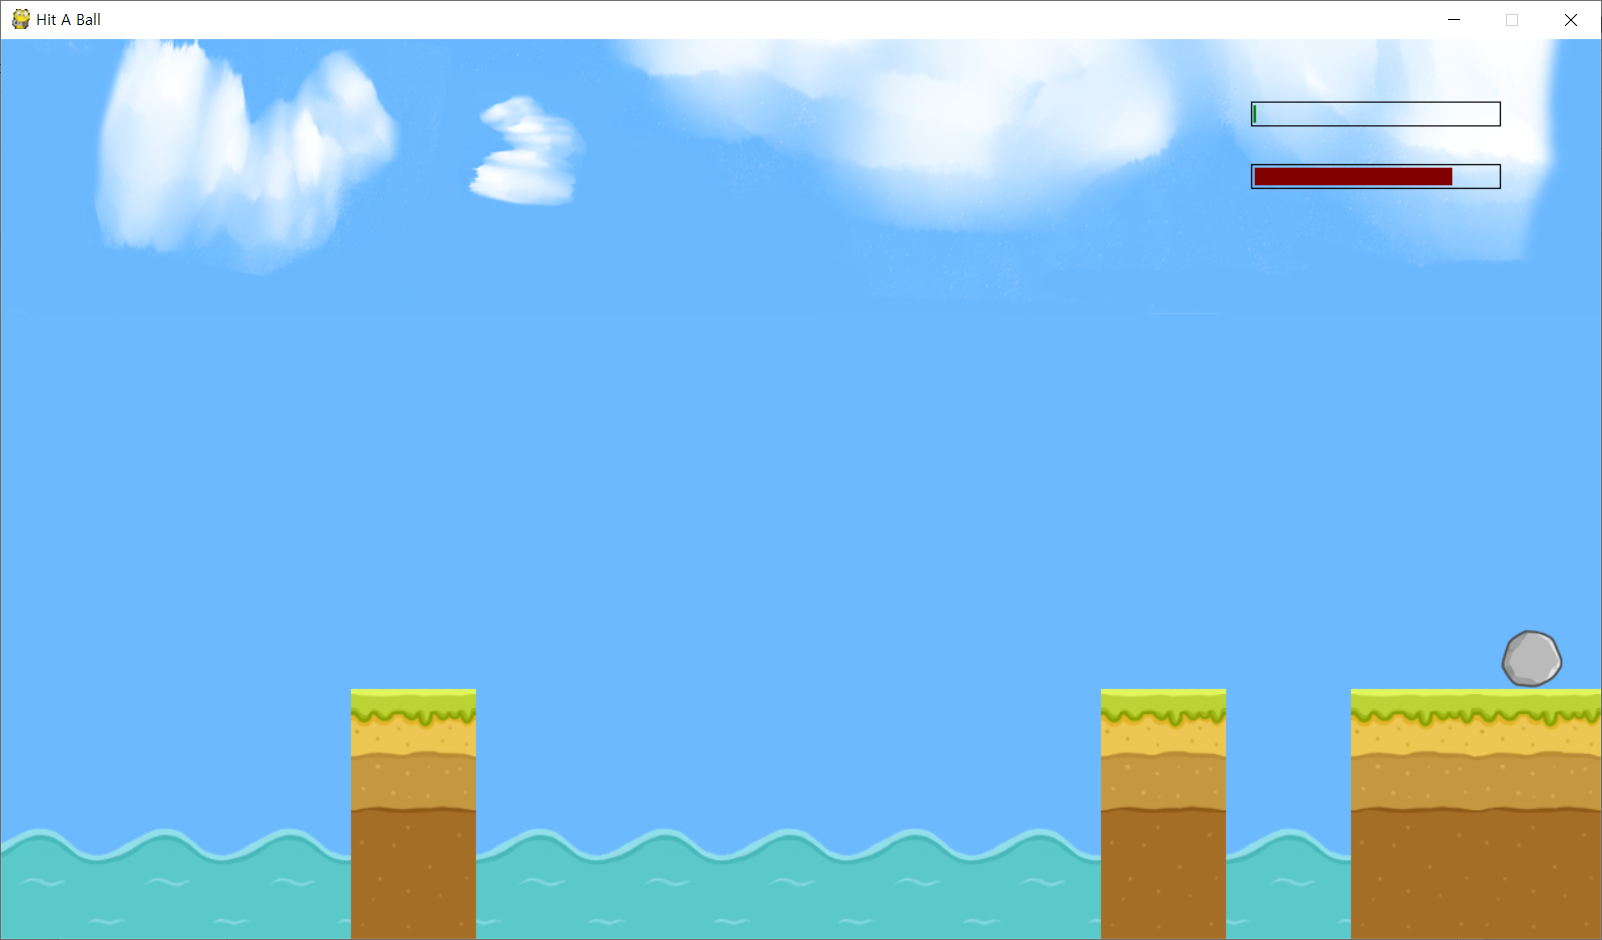

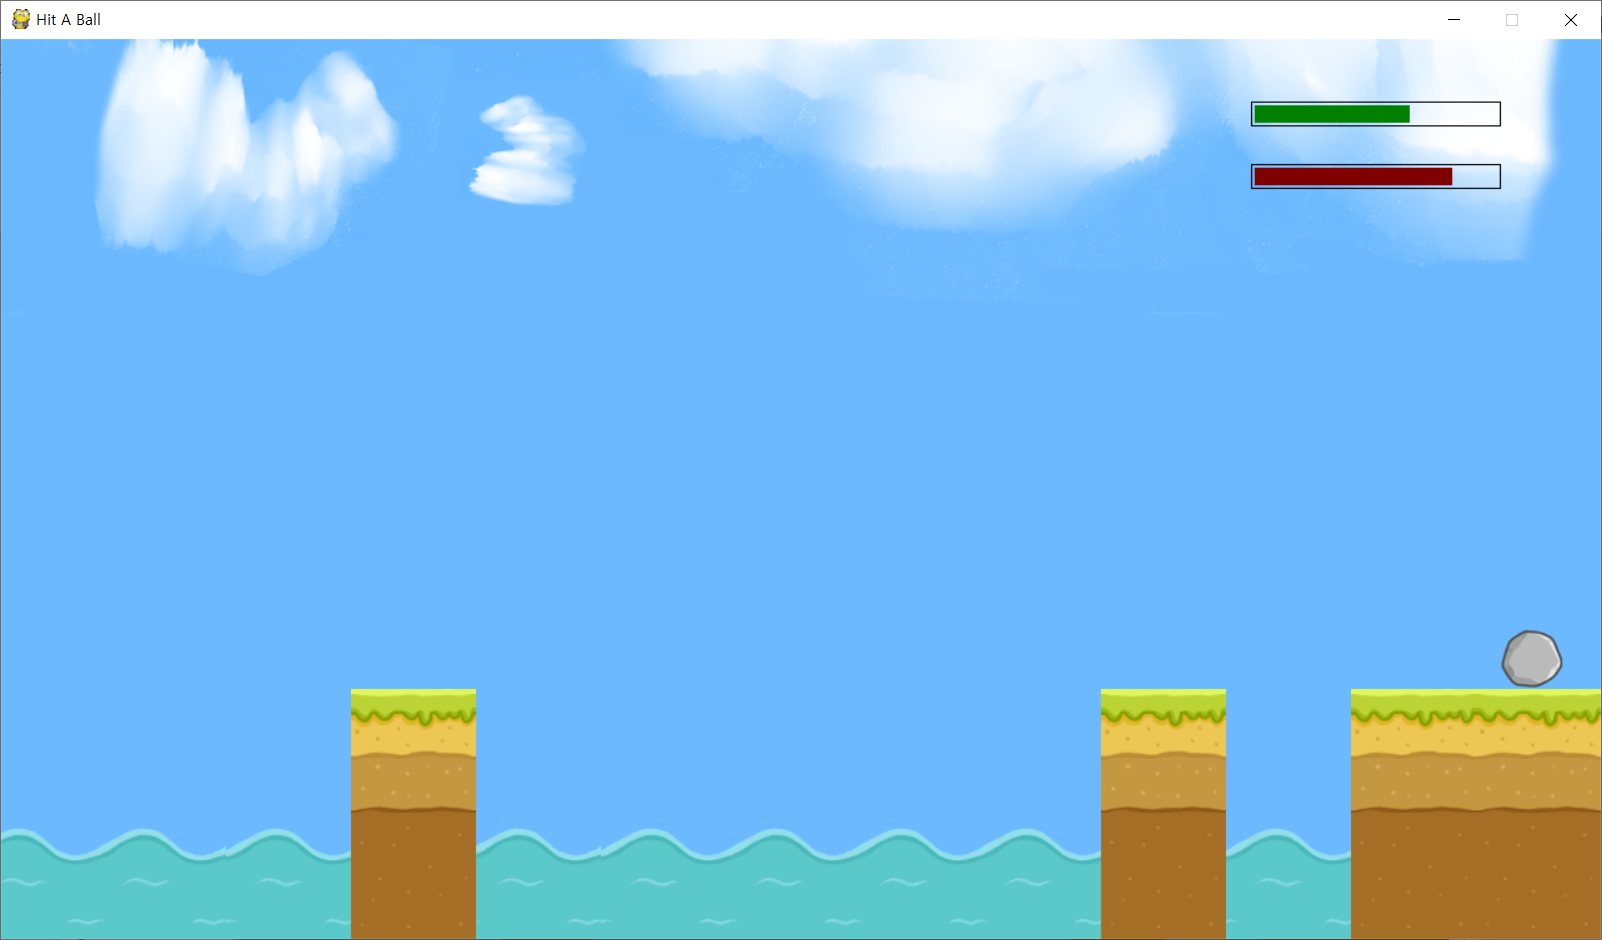

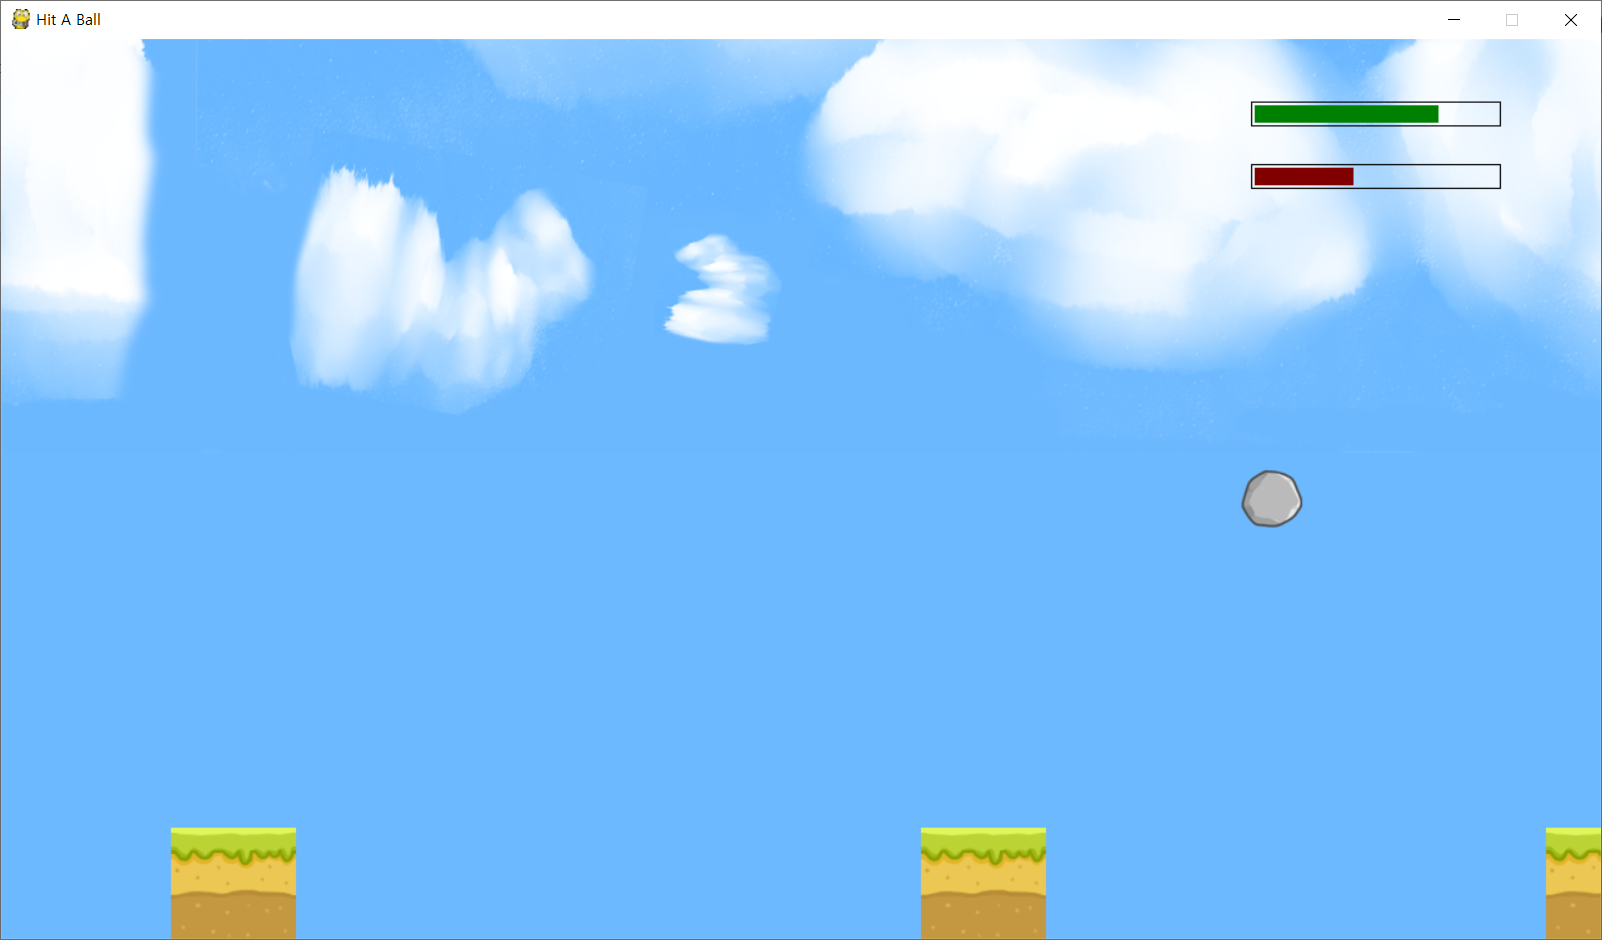

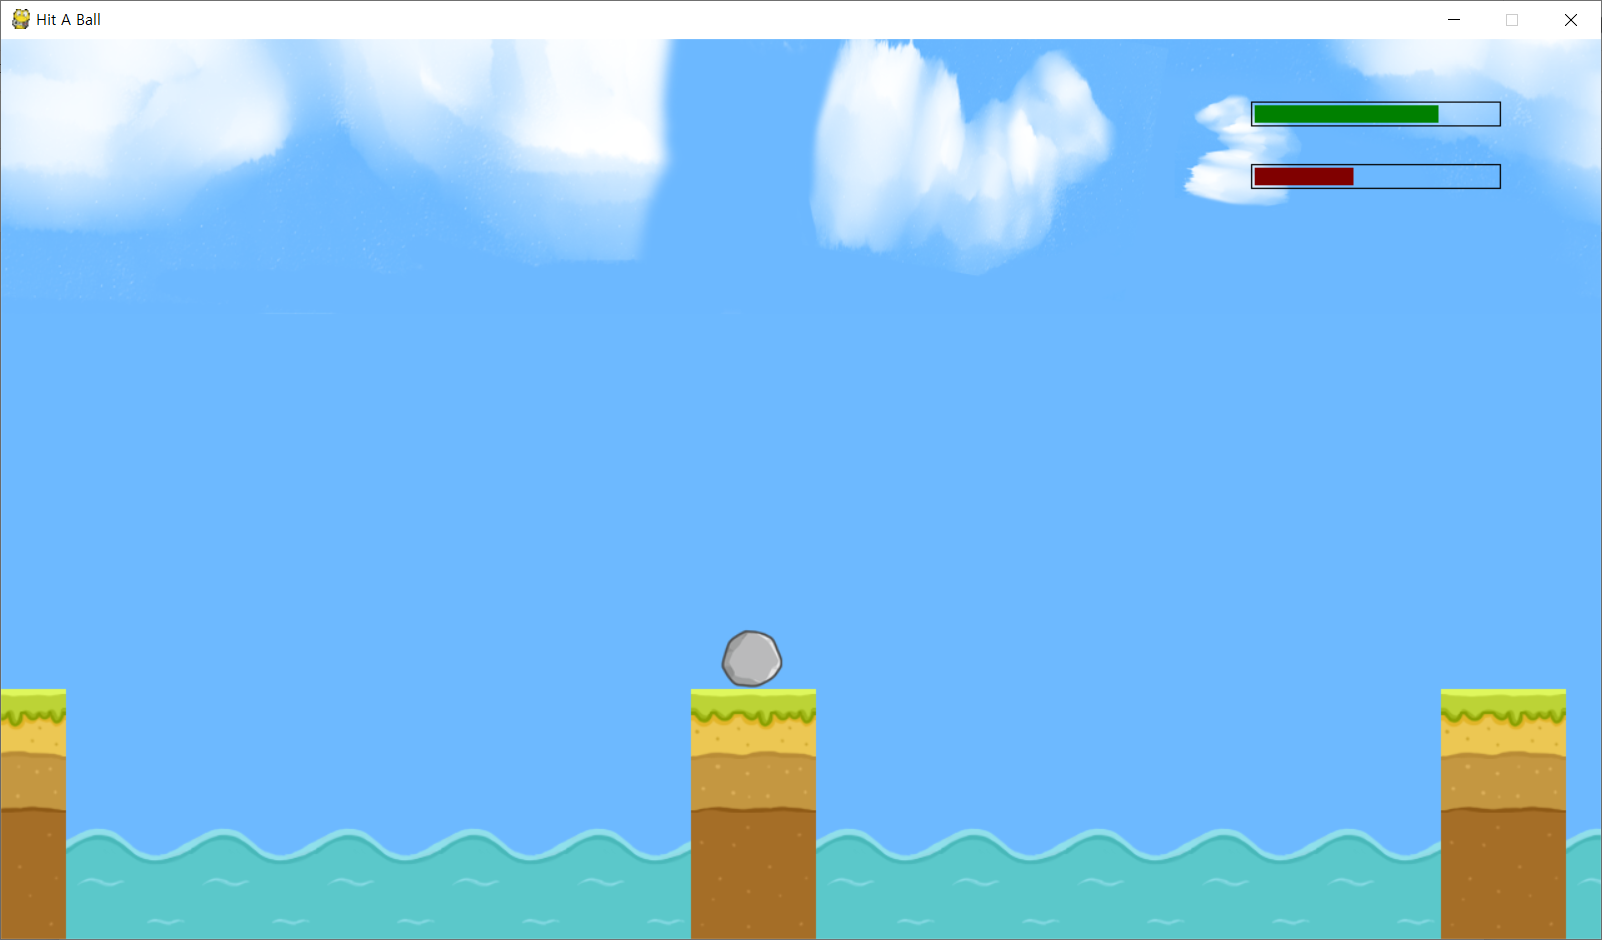

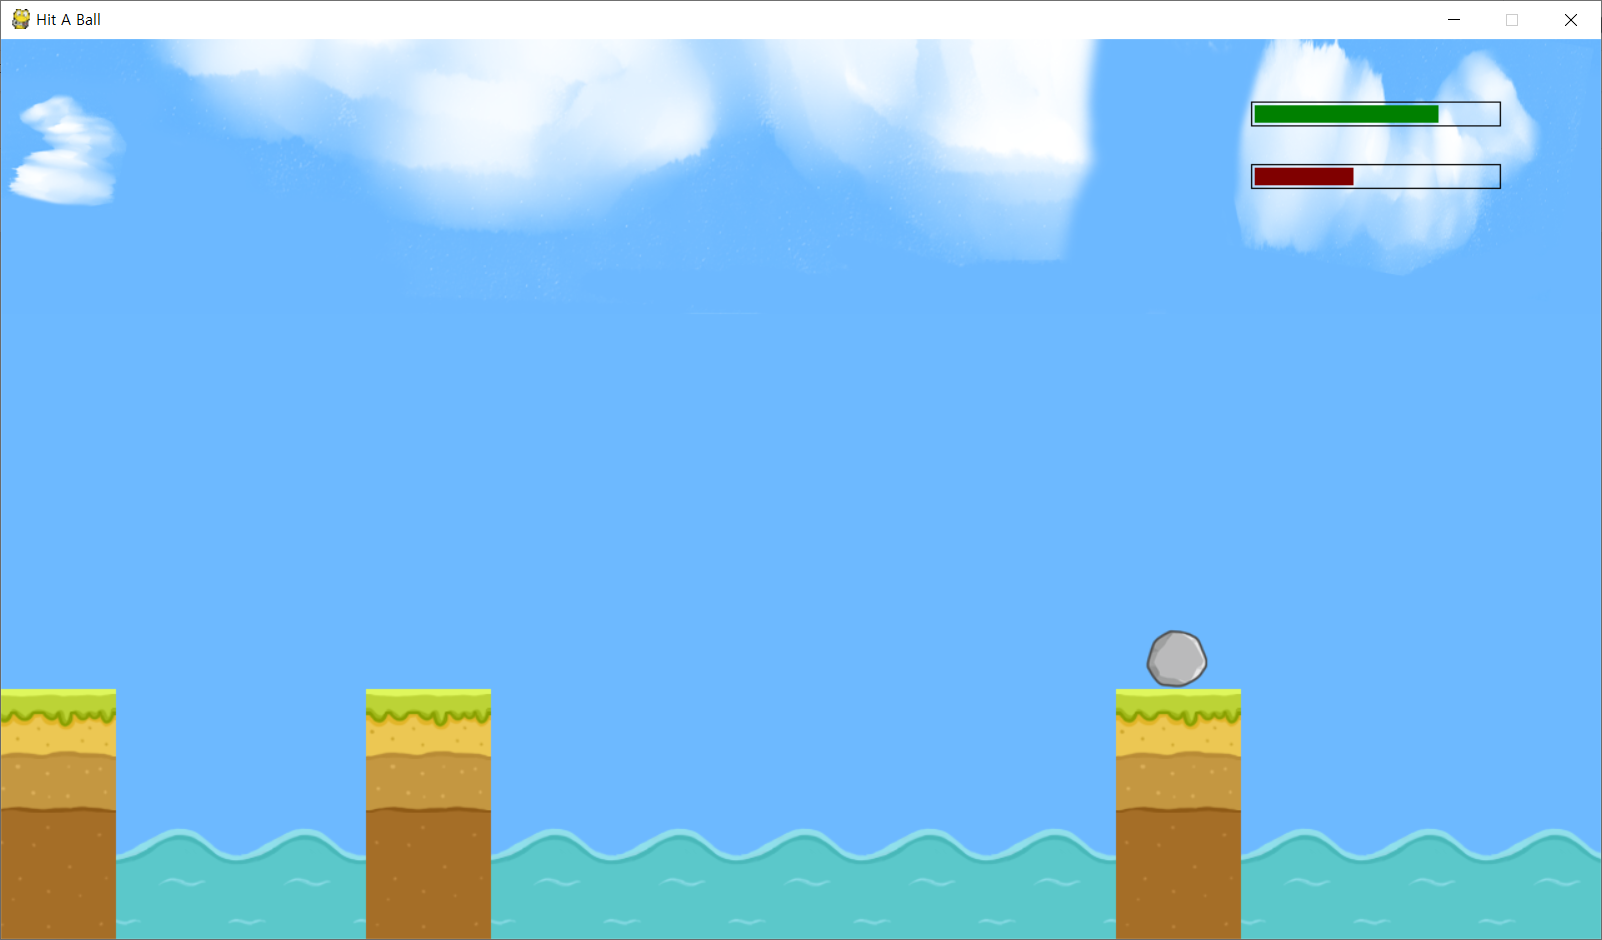

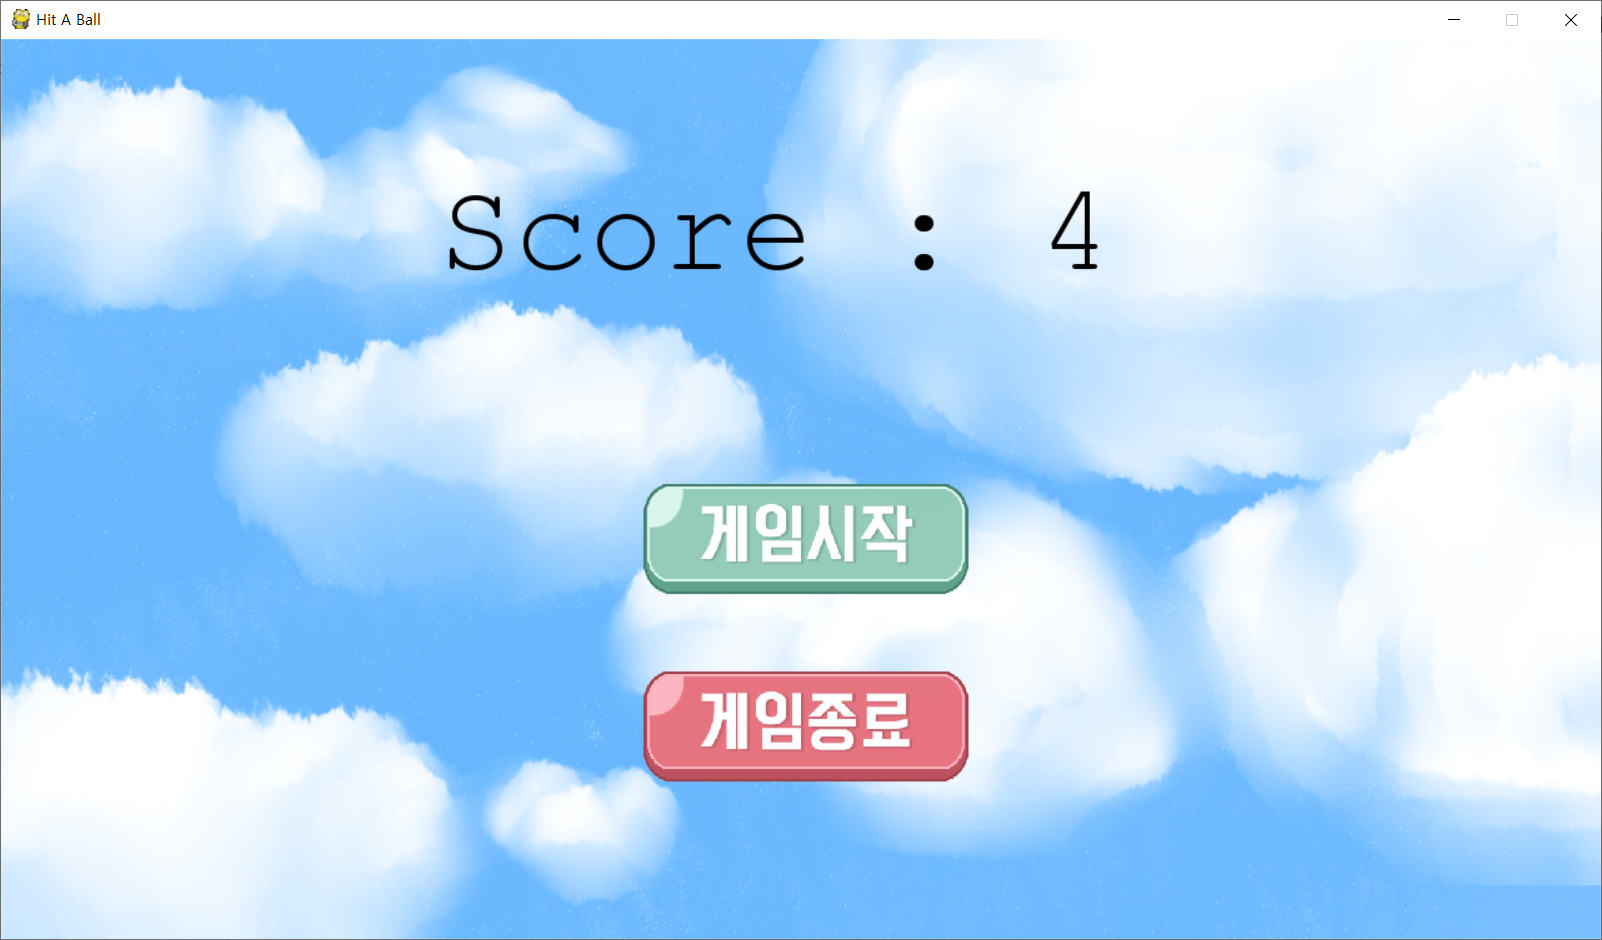

https://youtu.be/PbmwTzbQRQ8

## 8.Github

[Hit A Ball](https://github.com/DaLae37/HitABall)

현재 프로젝트의 모든 소스 코드와 리소스는 위 링크에서 확인할 수 있습니다